In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the relevant sklearn packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant
from sklearn.datasets import fetch_california_housing

# Set the figure size of matplotlib plots to (12,6)
plt.rcParams['figure.figsize'] = (15,6)

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

r = fetch_california_housing()

X = pd.DataFrame(r['data'], columns=r['feature_names'])
y = r['target']

print(r['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Business goal: predict the housing price 

In [4]:
# train split the data 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [8]:
# EDA 

df_X = pd.DataFrame(X_train)
df_y = pd.DataFrame(y_train)

df_train = pd.concat([df_X, df_y], axis = 1)

df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,0
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.862796,28.567890,5.420864,1.096900,1430.242733,3.027002,35.636369,-119.576885,2.066076
std,1.874988,12.591882,2.533229,0.494150,1127.389094,6.440630,2.137084,2.003028,1.147765
min,0.499900,1.000000,0.846154,0.375000,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.565175,18.000000,4.437950,1.006166,788.750000,2.425949,33.937500,-121.800000,1.201000
50%,3.535250,29.000000,5.227388,1.048676,1169.000000,2.814172,34.260000,-118.500000,1.792000
75%,4.737775,37.000000,6.042883,1.100015,1733.000000,3.279945,37.710000,-118.010000,2.650250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000,5.000010


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19827 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16512 non-null  float64
 1   HouseAge    16512 non-null  float64
 2   AveRooms    16512 non-null  float64
 3   AveBedrms   16512 non-null  float64
 4   Population  16512 non-null  float64
 5   AveOccup    16512 non-null  float64
 6   Latitude    16512 non-null  float64
 7   Longitude   16512 non-null  float64
 8   0           16512 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [11]:
df_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,0
MedInc,1.000000,-0.121451,0.317584,-0.059221,0.013920,0.001970,-0.082033,-0.012472,-0.000577
HouseAge,-0.121451,1.000000,-0.147236,-0.072718,-0.299321,0.012717,0.008242,-0.105915,-0.009772
AveRooms,0.317584,-0.147236,1.000000,0.855722,-0.068193,0.002184,0.104806,-0.028858,0.003536
AveBedrms,-0.059221,-0.072718,0.855722,1.000000,-0.064763,-0.004396,0.069249,0.009155,0.002931
Population,0.013920,-0.299321,-0.068193,-0.064763,1.000000,0.072998,-0.108392,0.099090,0.017583
AveOccup,0.001970,0.012717,0.002184,-0.004396,0.072998,1.000000,-0.005110,0.014088,-0.002271
Latitude,-0.082033,0.008242,0.104806,0.069249,-0.108392,-0.005110,1.000000,-0.924829,0.008654
Longitude,-0.012472,-0.105915,-0.028858,0.009155,0.099090,0.014088,-0.924829,1.000000,-0.005868
0,-0.000577,-0.009772,0.003536,0.002931,0.017583,-0.002271,0.008654,-0.005868,1.000000


<AxesSubplot:>

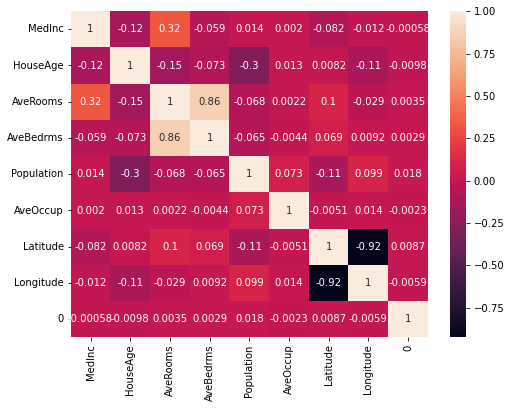

In [21]:
import seaborn as sns

ax = plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(), annot= True)

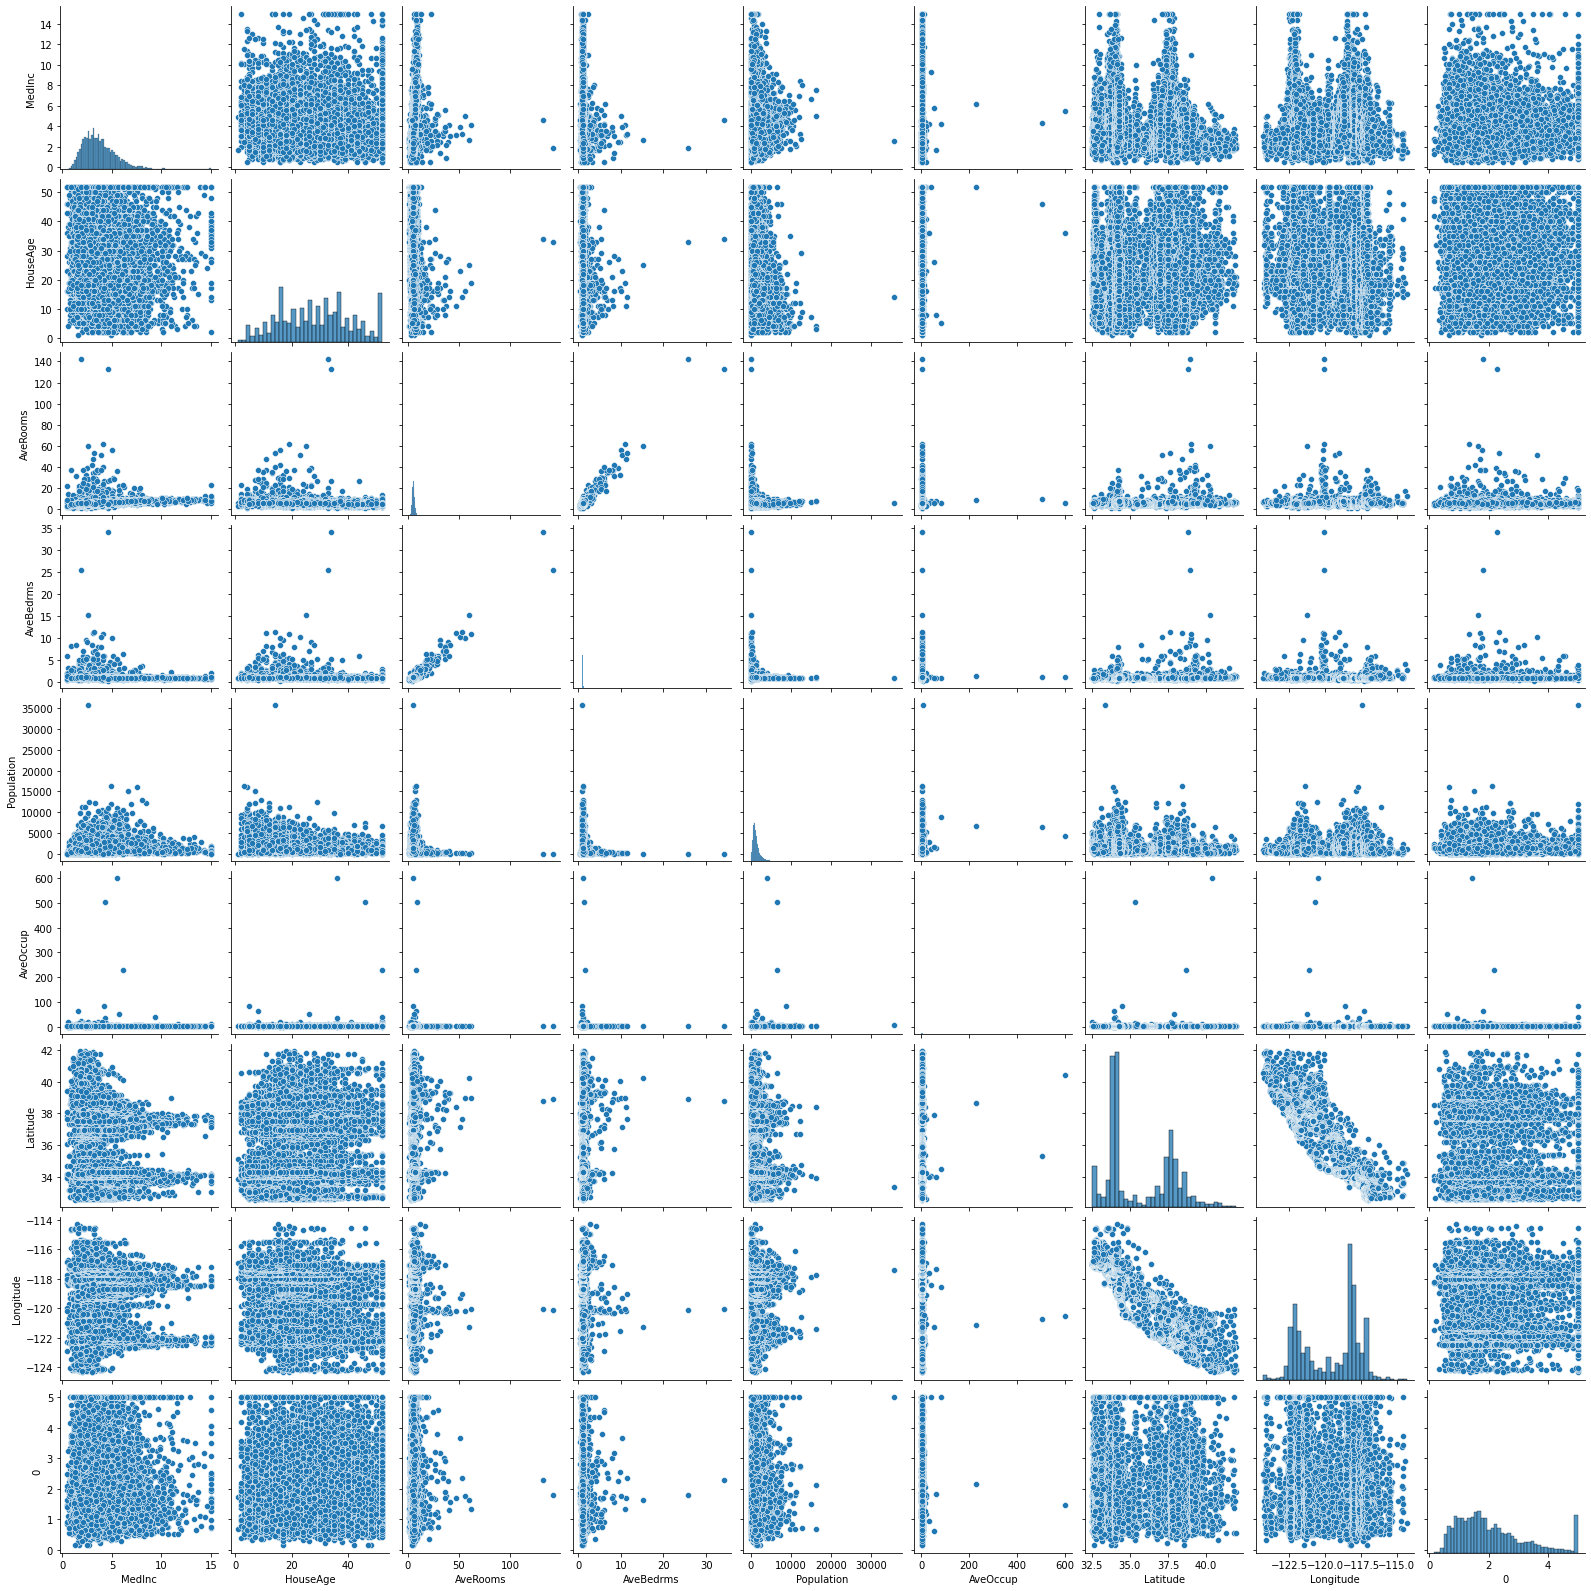

In [14]:
sns.pairplot(df_train)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant 

X_vif = add_constant(X_train) 

X_vif



/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
30,1.0,1.9274,49.0,5.068783,1.182540,863.0,2.283069,37.84,-122.28
19493,1.0,2.5148,27.0,5.073497,1.066815,995.0,2.216036,37.67,-121.00
9888,1.0,2.7619,21.0,4.043796,0.981752,524.0,1.912409,38.30,-122.30
13961,1.0,4.6394,13.0,18.977064,3.651376,573.0,2.628440,34.24,-116.88
2297,1.0,1.2716,19.0,3.477903,1.070412,4638.0,3.474157,36.81,-119.76
...,...,...,...,...,...,...,...,...,...
19025,1.0,4.2137,13.0,5.153724,0.966719,1915.0,3.034865,38.34,-121.99
16192,1.0,1.1250,31.0,3.700416,1.126214,1398.0,1.938974,37.96,-121.30
1579,1.0,7.3732,16.0,7.199525,1.040380,1087.0,2.581948,37.88,-122.02
10478,1.0,3.4750,16.0,5.485075,0.977612,1333.0,3.315920,33.60,-117.69


In [24]:
pd.Series([variance_inflation_factor(X_vif.values, i) 
            for i in range(X_vif.shape[1])], 
            index=X_vif.columns)

const         17090.147407
MedInc            2.475456
HouseAge          1.244986
AveRooms          8.681065
AveBedrms         7.351321
Population        1.140239
AveOccup          1.008464
Latitude          9.305347
Longitude         8.964783
dtype: float64

In [33]:
X_train.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
30,1.9274,49.0,5.068783,1.182540,863.0,2.283069,37.84,-122.28
19493,2.5148,27.0,5.073497,1.066815,995.0,2.216036,37.67,-121.00
9888,2.7619,21.0,4.043796,0.981752,524.0,1.912409,38.30,-122.30
13961,4.6394,13.0,18.977064,3.651376,573.0,2.628440,34.24,-116.88
2297,1.2716,19.0,3.477903,1.070412,4638.0,3.474157,36.81,-119.76


In [36]:
X_train = X_train.drop(['AveBedrms', 'Latitude'], axis=1)

In [49]:
import numpy as np
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                          2.113e+04
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:12:20   Log-Likelihood:                         -19789.
No. Observations:               16512   AIC:                                  3.959e+04
Df Residuals:                   16506   BIC:                                  3.964e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4439      0.004    125.997      0.000       0.437       0.451
HouseAge       0.0178      0.001     33.452      0.000       0.017       0.019
AveRooms      -0.0237      0.003     -8.971      0.000      -0.029      -0.018
Population  3.257e-05   5.85e-06      5.570      0.000    2.11e-05     4.4e-05
AveOccup      -0.0069      0.001     -7.137      0.000      -0.009      -0.005
Longitude      0.0004      0.000      1.882      0.060   -1.85e-05       0.001
==============================================================================
Omnibus:                     3621.425   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9340.014
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       5.808   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Feature engineering
#DROP redundant variables
# Is linear model something we want? skwed distribution

In [16]:
#train the model (baseline) # before assumptions and feature engineering
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, y_train)

LinearRegression()

In [17]:
m.coef_, m.intercept_

(array([ 4.38824545e-01,  9.45724007e-03, -1.07823077e-01,  6.33660135e-01,
        -4.32603886e-07, -4.81128837e-03, -4.19343309e-01, -4.32623918e-01]),
 -36.78251997909968)

In [38]:
# use regularization 
from sklearn.linear_model import Lasso
l = Lasso()
l.fit(X_train, y_train)
pd.DataFrame({'feature': X_train.columns, 'coefficient': l.coef_}).\
sort_values('coefficient')

,feature,coefficient
2,AveRooms,0.000000e+00
4,AveOccup,-0.000000e+00
5,Longitude,-0.000000e+00
3,Population,5.547414e-08
1,HouseAge,5.818601e-03
0,MedInc,1.401729e-01


In [39]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(l, X_train, y_train).mean()

0.2743576065483954

In [18]:
#make predictions
from sklearn.metrics import mean_squared_log_error
y_pred = m.predict(X_test)
m.score(X, y)


In [48]:
#evaluate the model
from sklearn.linear_model import LinearRegression 
r2 = m.score(y,y_pred)
print(r2)

ValueError: Expected 2D array, got 1D array instead:
array=[4.526 3.585 3.521 ... 0.923 0.847 0.894].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.